In [1]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

In [2]:
#combining no of csv file into one file with name combine_csv
os.chdir('D:\Final')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv


In [3]:
df.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)
df

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y
0,7.789,0.371,1.311,0.082,11.037,1.192,1,1
1,7.731,0.277,0.999,0.186,10.452,0.256,1,1
2,7.731,0.442,1.155,0.171,9.368,0.661,1,1
3,7.672,0.698,1.194,0.206,9.709,1.533,1,1
4,7.643,2.609,1.038,0.151,9.748,2.350,1,1
...,...,...,...,...,...,...,...,...
785,7.320,0.305,11.829,0.122,0.530,0.943,6,8
786,7.242,0.312,11.819,0.161,0.412,0.967,6,8
787,7.144,0.406,11.887,0.130,0.530,0.930,6,8
788,7.164,0.400,11.829,0.100,0.491,0.995,6,8


In [4]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
#grouped = df.groupby(['x', 'y']).agg(['min'])

# Add the mean or average value of each column to the grouped dataframe
grouped = df.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
df = grouped.reset_index()
df

,x,y,A_P_1_R_T_T,A_P_1_S_T_D_E_V,A_P_2_R_T_T,A_P_2_S_T_D_E_V,A_P_3_R_T_T,A_P_3_S_T_D_E_V
0,1,1,7.682077,1.468045,1.050224,0.138249,10.568485,1.682911
1,1,2,7.306811,1.604308,2.091507,1.572285,9.860562,0.866540
2,1,3,5.566168,1.096188,2.942460,0.308641,8.756523,0.427450
3,1,4,5.209767,0.518800,2.970219,0.294924,11.209696,0.226628
4,1,5,3.810318,0.626128,4.366355,0.568405,7.101791,1.755211
5,1,6,4.948261,0.485397,7.459974,0.139654,6.090467,0.277205
6,1,7,2.669858,2.234651,6.657000,1.608237,7.164004,0.931583
7,1,8,1.172300,0.267215,10.099617,0.161544,5.680480,1.060779
8,2,1,7.961054,0.170011,2.474627,0.931758,10.461686,0.759400
9,2,2,6.596997,1.857211,3.443035,0.201802,9.061454,1.517238


In [5]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP1STDEV_MEAN','A_P_3_S_T_D_E_V':'AP1STDEV_MEAN'}
df.rename(columns=new_name,inplace=True)
df


,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP1STDEV_MEAN,AP3RTT_MEAN,AP1STDEV_MEAN
0,1,1,7.682077,1.468045,1.050224,0.138249,10.568485,1.682911
1,1,2,7.306811,1.604308,2.091507,1.572285,9.860562,0.866540
2,1,3,5.566168,1.096188,2.942460,0.308641,8.756523,0.427450
3,1,4,5.209767,0.518800,2.970219,0.294924,11.209696,0.226628
4,1,5,3.810318,0.626128,4.366355,0.568405,7.101791,1.755211
5,1,6,4.948261,0.485397,7.459974,0.139654,6.090467,0.277205
6,1,7,2.669858,2.234651,6.657000,1.608237,7.164004,0.931583
7,1,8,1.172300,0.267215,10.099617,0.161544,5.680480,1.060779
8,2,1,7.961054,0.170011,2.474627,0.931758,10.461686,0.759400
9,2,2,6.596997,1.857211,3.443035,0.201802,9.061454,1.517238


In [6]:
input_data=df.iloc[:,2:] 
output_data = df.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [7]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 6)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 1.346
Root Mean Squared Error (RMSE) on new data in meter: 1.160
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.689
R2 score is in percent: 68.20


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse)) 

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.35
Root Mean Squared Error (RMSE) on new data in m: 1.16
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 36.520
R2 score is in percent: 67.09


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(6,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [13]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='test_raww',
    project_name='hellooooo_raww')

INFO:tensorflow:Reloading Tuner from test_raww\hellooooo_raww\tuner0.json


In [14]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [15]:
tuner.results_summary()

Results summary
Results in test_raww\hellooooo_raww
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 112
dropout_1: 0.30000000000000004
num_hidden_layers: 1
units_2: 304
activation_2: sigmoid
dropout_2: 0.4
learning_rate: 0.001
units_3: 208
activation_3: sigmoid
dropout_3: 0.1
units_4: 336
activation_4: tanh
dropout_4: 0.2
units_5: 32
activation_5: sigmoid
dropout_5: 0.1
units_6: 480
activation_6: relu
dropout_6: 0.1
units_7: 192
activation_7: sigmoid
dropout_7: 0.2
units_8: 320
activation_8: sigmoid
dropout_8: 0.30000000000000004
units_9: 208
activation_9: tanh
dropout_9: 0.30000000000000004
units_10: 160
activation_10: sigmoid
dropout_10: 0.0
Score: 0.8311991890271505
Trial summary
Hyperparameters:
units_1: 352
dropout_1: 0.30000000000000004
num_hidden_layers: 1
units_2: 336
activation_2: tanh
dropout_2: 0.4
learning_rate: 0.01
units_3: 352
activation_3: sigmoid
dropout_3: 0.1
units_4: 400
activation_4: relu
dropout_4: 0.2
units_5: 352
activation_5: sigmoid
dropout_5: 0

In [16]:
best_hps=tuner.get_best_hyperparameters()[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 0s 494ms/step - loss: 15.7331 - mse: 15.7331 - val_loss: 16.2568 - val_mse: 16.2568
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 14.7029 - mse: 14.7029 - val_loss: 14.8727 - val_mse: 14.8727
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 13.7673 - mse: 13.7673 - val_loss: 13.5851 - val_mse: 13.5851
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 12.3585 - mse: 12.3585 - val_loss: 12.3858 - val_mse: 12.3858
Epoch 5/500
1/1 [==============================] - 0s 18ms/step - loss: 10.7645 - mse: 10.7645 - val_loss: 11.2762 - val_mse: 11.2762
Epoch 6/500
1/1 [==============================] - 0s 21ms/step - loss: 9.4914 - mse: 9.4914 - val_loss: 10.2539 - val_mse: 10.2539
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 8.8771 - mse: 8.8771 - val_loss: 9.3276 - val_mse: 9.3276
Epoch 8/500
1/1 [==============================] - 0s 17ms/step - l

1/1 [==============================] - 0s 18ms/step - loss: 1.1253 - mse: 1.1253 - val_loss: 1.3806 - val_mse: 1.3806
Epoch 64/500
1/1 [==============================] - 0s 16ms/step - loss: 1.4327 - mse: 1.4327 - val_loss: 1.3533 - val_mse: 1.3533
Epoch 65/500
1/1 [==============================] - 0s 32ms/step - loss: 1.3391 - mse: 1.3391 - val_loss: 1.3279 - val_mse: 1.3279
Epoch 66/500
1/1 [==============================] - 0s 16ms/step - loss: 1.1378 - mse: 1.1378 - val_loss: 1.3044 - val_mse: 1.3044
Epoch 67/500
1/1 [==============================] - 0s 17ms/step - loss: 1.2996 - mse: 1.2996 - val_loss: 1.2880 - val_mse: 1.2880
Epoch 68/500
1/1 [==============================] - 0s 17ms/step - loss: 1.6432 - mse: 1.6432 - val_loss: 1.2707 - val_mse: 1.2707
Epoch 69/500
1/1 [==============================] - 0s 32ms/step - loss: 1.1988 - mse: 1.1988 - val_loss: 1.2525 - val_mse: 1.2525
Epoch 70/500
1/1 [==============================] - 0s 18ms/step - loss: 0.9135 - mse: 0.9135 - 

1/1 [==============================] - 0s 17ms/step - loss: 0.8523 - mse: 0.8523 - val_loss: 0.9604 - val_mse: 0.9604
Epoch 126/500
1/1 [==============================] - 0s 18ms/step - loss: 0.7338 - mse: 0.7338 - val_loss: 0.9542 - val_mse: 0.9542
Epoch 127/500
1/1 [==============================] - 0s 18ms/step - loss: 0.9000 - mse: 0.9000 - val_loss: 0.9508 - val_mse: 0.9508
Epoch 128/500
1/1 [==============================] - 0s 17ms/step - loss: 0.8681 - mse: 0.8681 - val_loss: 0.9462 - val_mse: 0.9462
Epoch 129/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6140 - mse: 0.6140 - val_loss: 0.9296 - val_mse: 0.9296
Epoch 130/500
1/1 [==============================] - 0s 17ms/step - loss: 1.0792 - mse: 1.0792 - val_loss: 0.9155 - val_mse: 0.9155
Epoch 131/500
1/1 [==============================] - 0s 17ms/step - loss: 1.0727 - mse: 1.0727 - val_loss: 0.9053 - val_mse: 0.9053
Epoch 132/500
1/1 [==============================] - 0s 17ms/step - loss: 0.7998 - mse: 0.

In [17]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 11ms/step - loss: 0.9397 - mse: 0.9397


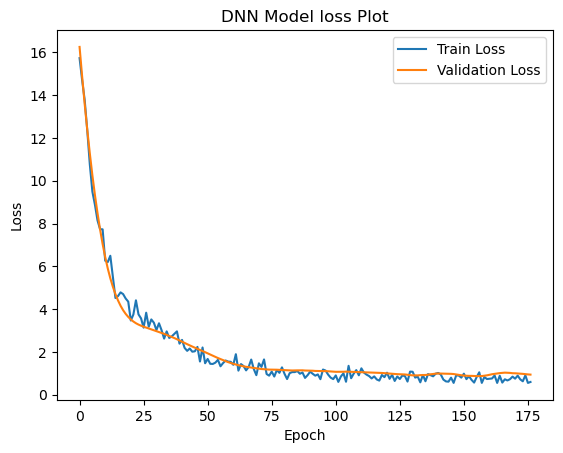

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [19]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 58ms/step


array([[5.9607344 , 5.8471756 ],
       [5.9948945 , 3.0514681 ],
       [2.0353444 , 3.3720703 ],
       [2.0400815 , 5.574958  ],
       [4.071133  , 1.0823162 ],
       [3.5559497 , 5.3480725 ],
       [2.2066975 , 5.231998  ],
       [4.2563114 , 5.6950192 ],
       [3.889746  , 3.2348247 ],
       [2.5824337 , 6.709407  ],
       [2.3043323 , 1.5595971 ],
       [3.0631642 , 0.99782115]], dtype=float32)

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.94
Root Mean Squared Error (RMSE) on new data in m: 0.97
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 25.68
R2 score is in percent: 77.22


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 0.166
Root Mean Squared Error (RMSE) on new data in meter: 0.407
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 12.935
R2 score is in percent: 94.95


In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.77
Root Mean Squared Error (RMSE) on new data in m: 0.88
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.38
R2 score is in percent: 75.25


In [23]:
from tensorflow.keras.models import load_model

dnn_model.save('my_DNN_Regrr_model_xy_no_feature_extraction.h5')


In [24]:
loaded_model = load_model('my_DNN_Regrr_model_xy_no_feature_extraction.h5')
loaded_model

In [25]:
dfff=pd.read_csv('D:/testt.csv')

In [26]:
dfff.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)

In [27]:
# Add the mean or average value of each column to the grouped dataframe
grouped = dfff.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
df = grouped.reset_index()
df

,x,y,A_P_1_R_T_T,A_P_1_S_T_D_E_V,A_P_2_R_T_T,A_P_2_S_T_D_E_V,A_P_3_R_T_T,A_P_3_S_T_D_E_V
0,1,1,7.707727,1.848299,1.044589,0.141585,10.718671,1.587250
1,1,2,7.365578,2.194745,2.080257,1.555030,9.977772,0.945368
2,1,3,5.488693,1.054929,2.950386,0.304836,8.557814,0.499264
3,1,4,5.132376,0.544648,3.034266,0.205060,10.871507,0.390431
4,1,5,3.839836,0.735971,4.407919,0.549324,7.114536,1.709690
5,1,6,4.905374,0.370085,7.411877,0.148853,6.012209,0.291436
6,1,7,2.661546,2.264162,6.661156,1.620737,7.171201,0.941743
7,1,8,1.216686,0.418363,10.075713,0.189108,5.769130,1.008381
8,2,1,7.930118,0.178429,2.441135,0.839498,11.735521,0.445599
9,2,2,6.574464,1.783223,3.448252,0.176038,9.213649,1.413693


In [28]:
input_data=df.iloc[:,2:] 
output_data = df.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)


In [29]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 6)


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX= sc.fit_transform(XX)

In [31]:
y_predd=loaded_model.predict(XX)
y_predd

2/2 [==============================] - 0s 0s/step


array([[1.5370231 , 0.5251437 ],
       [1.6725075 , 1.2140747 ],
       [1.2262003 , 2.976258  ],
       [0.8684129 , 3.1934068 ],
       [2.052509  , 3.9713476 ],
       [1.9156508 , 5.8893585 ],
       [2.1683965 , 5.4972725 ],
       [1.4579837 , 7.976592  ],
       [3.054468  , 1.3394442 ],
       [1.7424837 , 1.7518016 ],
       [1.9056206 , 3.4102674 ],
       [1.744349  , 4.4972124 ],
       [2.3709664 , 4.802902  ],
       [2.1622295 , 5.939438  ],
       [1.8819158 , 5.839184  ],
       [2.6653032 , 6.8879633 ],
       [2.8408356 , 1.2009497 ],
       [2.4223301 , 2.0385182 ],
       [3.1987367 , 2.6249921 ],
       [2.7378557 , 3.757342  ],
       [3.3608837 , 7.6810937 ],
       [4.093892  , 1.6090379 ],
       [3.2945251 , 2.3480458 ],
       [3.6176667 , 2.9290755 ],
       [3.8843586 , 3.877673  ],
       [2.823187  , 5.2322264 ],
       [3.7343433 , 5.723753  ],
       [4.3735566 , 5.9441833 ],
       [5.109478  , 7.296829  ],
       [5.7478786 , 0.88887817],
       [4.

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.39
Root Mean Squared Error (RMSE) on new data in mm: 0.63
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 19.11
R2 score is in percent: 90.10


In [33]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(y_predd, columns=['predicted_x','predicted_y'])
df_finall_dnn = pd.DataFrame()
df_finall_dnn = pd.concat([y_predd, yy], axis=1)
df_finall_dnn

,predicted_x,predicted_y,x,y
0,1.537023,0.525144,1,1
1,1.672508,1.214075,1,2
2,1.226200,2.976258,1,3
3,0.868413,3.193407,1,4
4,2.052509,3.971348,1,5
5,1.915651,5.889359,1,6
6,2.168396,5.497272,1,7
7,1.457984,7.976592,1,8
8,3.054468,1.339444,2,1
9,1.742484,1.751802,2,2


In [34]:
df_finall_dnn.to_csv('output_data_dnn_no_ex.csv', index=False)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import r2_score

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_predd,yy)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 0.088
Root Mean Squared Error (RMSE) on new data in meter: 0.296
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.42
R2 score is in percent: 97.64


In [36]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.185000,1.290000,1,1
1,1.405000,1.805000,1,2
2,1.163333,3.198333,1,3
3,1.220000,3.598333,1,4
4,1.452500,4.410000,1,5
5,1.360000,6.210000,1,6
6,1.325833,6.685000,1,7
7,1.280000,7.740000,1,8
8,2.330000,1.160000,2,1
9,1.897500,1.986500,2,2


In [37]:
#df_finall.to_csv('output_data_no_ex.csv', index=False)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_predd, yy)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.17
Root Mean Squared Error (RMSE) on new data in m: 0.41
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 15.72
R2 score is in percent: 95.50


In [39]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state = 42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(XX_train, yy_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(XX_test)

# Calculate the mean squared error
mse = mean_squared_error(yy_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 1.050
Root Mean Squared Error (RMSE) on new data in meter: 1.025
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 32.55
R2 score is in percent: 72.10


In [41]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(XX_train,yy_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(XX_test)

# Calculate the evaluation metrics
mse = mean_squared_error(yy_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.13
Root Mean Squared Error (RMSE) on new data in m: 1.06
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 38.37
R2 score is in percent: 70.99
